In [496]:
#The purpose of the following functions is to make the appropriate plots for the airtable

# <font color='black'> Files and Functions </font>

In [497]:
# List Files to include
import os
import gdx

path = os.getcwd()
file = []; 
#file.append("DAS_2020May29_newNorm.gdx");
file.append("DAS_2020May30_newWeight.gdx");
runval = gdx.File(path+"/"+file[0], lazy=True, implicit=True, skip={}) 


/Users/Anjuli/anaconda3/lib/python3.7/site-packages/gdx/__init__.py:136: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  super(File, self).set_coords(name, inplace=True)


In [498]:
# Functions
%run 'DAS_Krishna_Workflow_Functions.py'
%run 'Norm_and_Weights.py'

In [499]:
from pandas import *
xls = ExcelFile('/Users/Anjuli/Desktop/__FINAL_DAS/TestingGAMS2.xlsx')
df = xls.parse(xls.sheet_names[1], header=0)
row_num = df.set_index('var')['row_num'].to_dict()
#row_num

In [500]:
def write_to_excel(varname, rownum):
    #write to excel
    from openpyxl import load_workbook
    wb = load_workbook(filename = '/Users/Anjuli/Desktop/__FINAL_DAS/TestingGAMS2.xlsx')
    sheet = wb.active
    num = str(row_num[varname])
    sheet["E"+num] = W*1
    sheet["F"+num] = norm*1
    sheet["G"+num] = resid_stdev
    sheet["H"+num] = resid_mean
    wb.save(filename='/Users/Anjuli/Desktop/__FINAL_DAS/TestingGAMS2.xlsx')
    wb.close()

In [501]:
def do_two_sided_t_test(data):
    import scipy
    import numpy as np
    
    true_mean =0; 
    alpha = 0.05;
    
    t_stat, pvalue = scipy.stats.ttest_1samp(data, true_mean, axis=0, nan_policy='omit')#ignore nans
    
    print()
    print('T Test from scipy.stats')
    print('t_stat=%.3f'%t_stat)
    print('p-value=%.3e' %pvalue)
    
    if pvalue > alpha:
        print('(p>'+str(alpha)+') Accept null hypothesis that the mean is equal to ' + str(true_mean) +'from normal distrn')
        test = True
    else:
        print('(p<'+str(alpha)+') Reject the null hypothesis that the means is equal to '+ str(true_mean) +'from normal distrn')
        test = False
    
    
    x = np.linspace(min(data), max(data), 100)
    y1 = scipy.stats.norm.pdf(x)
    y2 = scipy.stats.norm.pdf(x, loc= np.nanmean(data))
        
    return test

In [502]:
savepath = '/Users/Anjuli/Desktop/__FINAL_DAS/deleteme'

# <font color='black'> Residual Check and Data Comparisons </font>

## <font color='red'> Crop Area </font>

### <font color='green'> CA Resid </font>

Residual Stats
CA
mean=-0.005
stdv=0.143

Normality Test from scipy.stats
Statistics=13180.770, p=0.000
Sample does not look Gaussian (p<0.05)

T Test from scipy.stats
t_stat=-3.431
p-value=6.038e-04
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

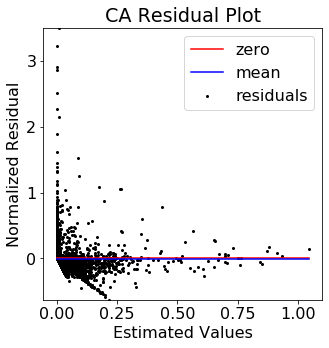

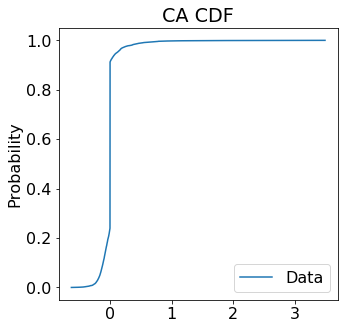

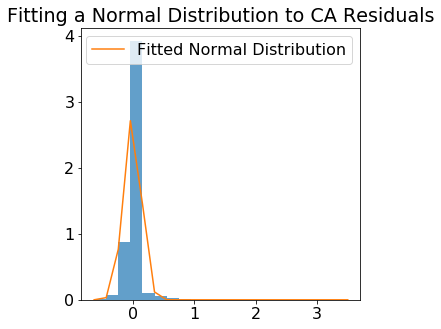

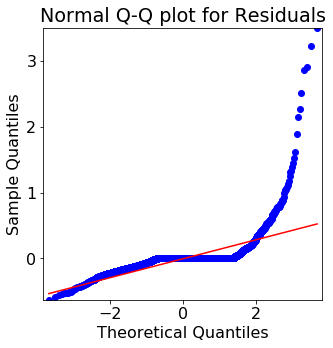

In [503]:
varname = 'CA'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitCA)
dat = ToDF(runval.CA_Data2*1e-3) #thousand km
mod = ToDF(runval.CA_Modeled)

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

do_two_sided_t_test(norm_residual)

### <font color='green'> IRA Resid </font>

Residual Stats
IR
mean=-0.027
stdv=0.100

Normality Test from scipy.stats
Statistics=8350.014, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.142
weight=1.000

T Test from scipy.stats
t_stat=-18.079
p-value=1.359e-70
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


/Users/Anjuli/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


False

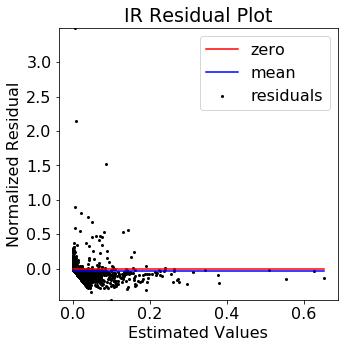

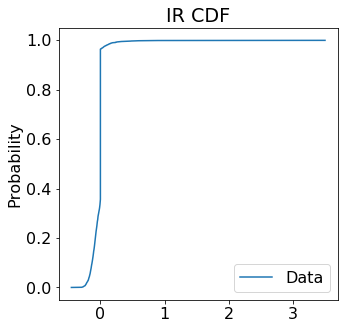

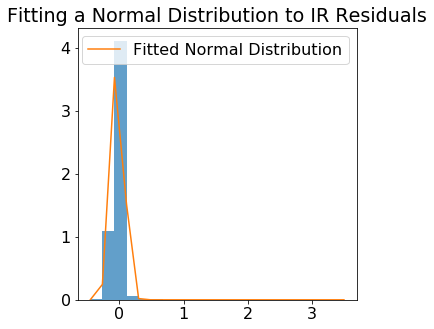

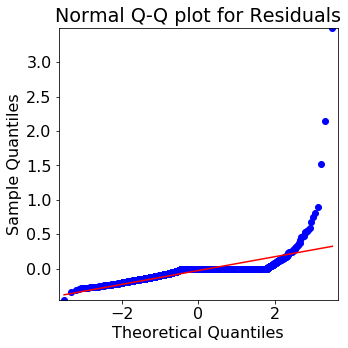

In [504]:
res = ToDF(runval.misfitCA)
dat = ToDF(runval.CA_Data2*1e-3) #thousand km
mod = ToDF(runval.CA_Modeled)

varname = 'IR'
ira_dat = dat.loc(axis=0)[:, :, 'ir',:]
ira_mod = mod.loc(axis=0)[:, :, 'ir',:]
ira_res = res.loc(axis=0)[:, :, 'ir',:]

norm = ToDF(runval.CA_norm2).loc(axis=0)['ir']['CA_norm2']   # normalization value
#W = runval.W_CA.data*1
W=1;

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, ira_res,ira_dat,ira_mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> RFA Resid </font>

Residual Stats
RF
mean=0.025
stdv=0.215

Normality Test from scipy.stats
Statistics=3215.459, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.340

T Test from scipy.stats
t_stat=6.430
p-value=1.479e-10
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

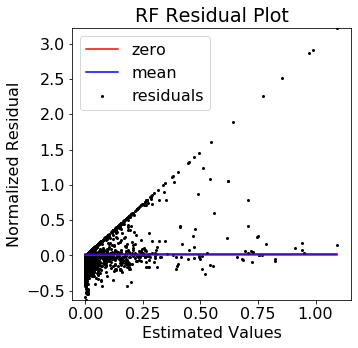

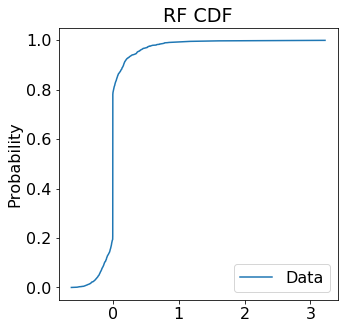

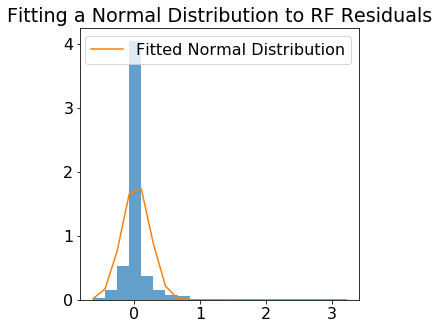

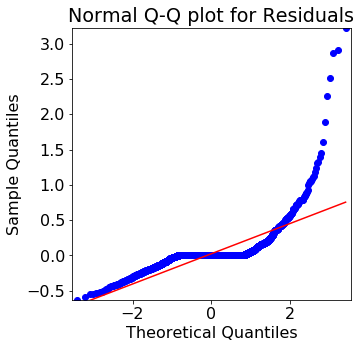

In [505]:
res = ToDF(runval.misfitCA)
dat = ToDF(runval.CA_Data2*1e-3) #thousand km
mod = ToDF(runval.CA_Modeled)


#--------------

varname = 'RF'
rfa_dat = dat.loc(axis=0)[:, :, 'rf',:]
rfa_mod = mod.loc(axis=0)[:, :, 'rf',:]
rfa_res = res.loc(axis=0)[:, :, 'rf',:]

norm = ToDF(runval.CA_norm2).loc(axis=0)['rf']['CA_norm2']     # normalization value

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, rfa_res,dat,rfa_dat, savepath)

print('norm=%.3f'%norm)
#print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> CA Bar Graph </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


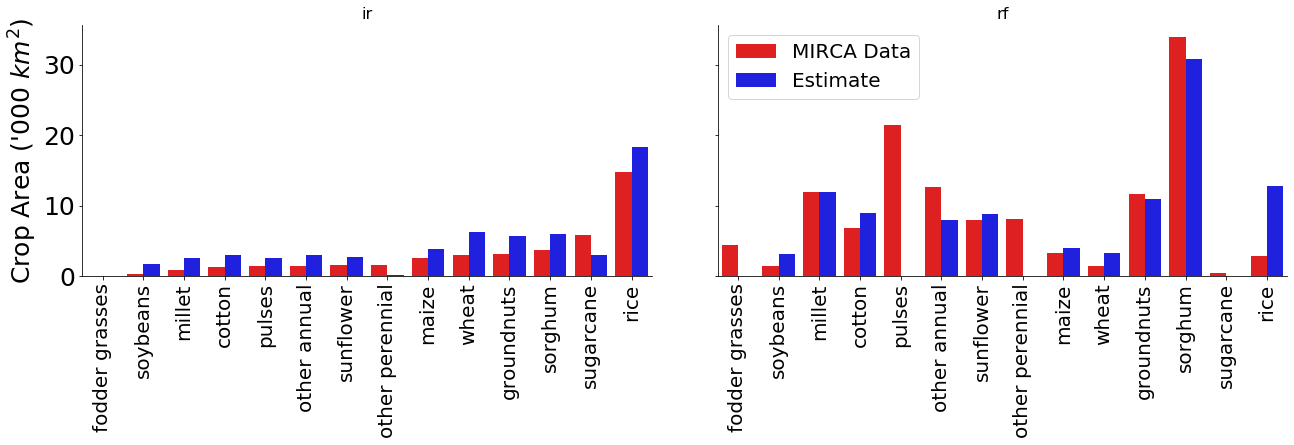

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


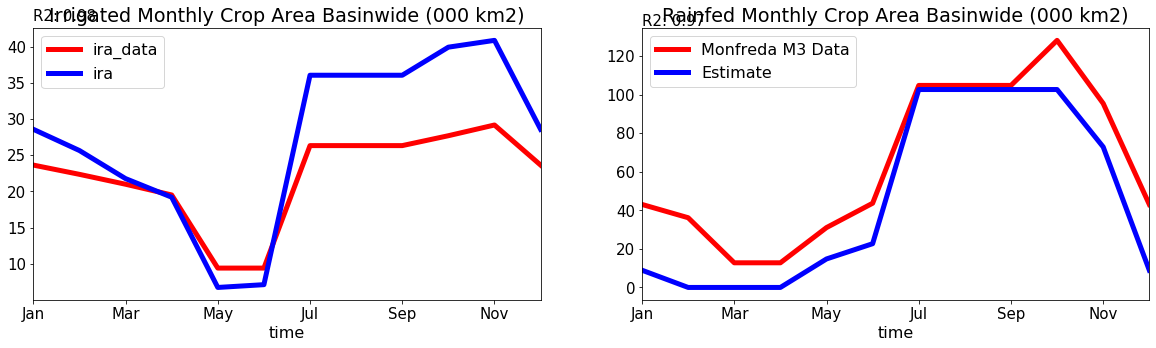

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


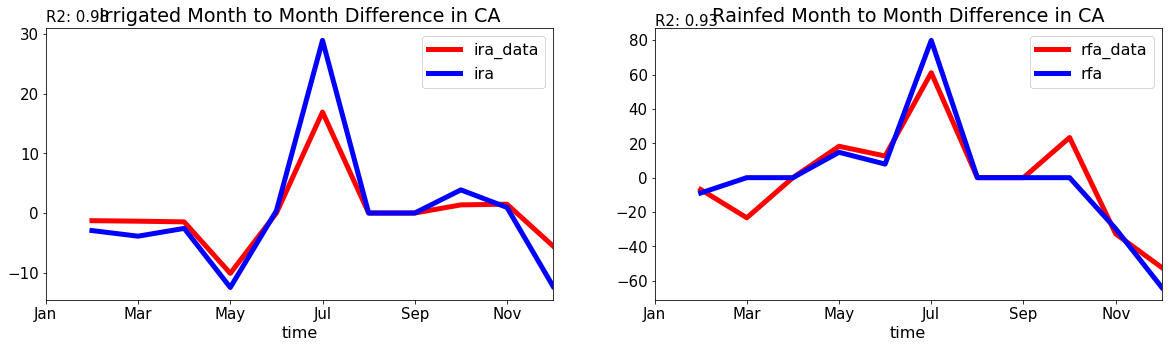

In [506]:
# Plots for Data
# Crop Area
CropAreaPlot(runval, savepath) #Function in Workflow Functions

input_data = gdx.File(os.getcwd()+"/"+"inputs.gdx")

ira_data= monthsort(ToDF(input_data.CA_Data[:,:,:,0,:]).groupby(level=['time']).sum(),0)*1e-3 #thousand m2
rfa_data= monthsort(ToDF(input_data.CA_Data[:,:,:,1,:]).groupby(level=['time']).sum(),0)*1e-3
ira_data.columns=['ira_data']
rfa_data.columns=['rfa_data']

# Function To Plot and Calculate
CA_stats_corr, ira, rfa = LanduseTimeSeriesPlot (path,file,[], ira_data, rfa_data, savepath)


## <font color='red'> Production </font>

### <font color='green'> Prod Resid </font>

Residual Stats
Prod
mean=0.001
stdv=0.009

Normality Test from scipy.stats
Statistics=4031.102, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.250

T Test from scipy.stats
t_stat=5.813
p-value=6.910e-09
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

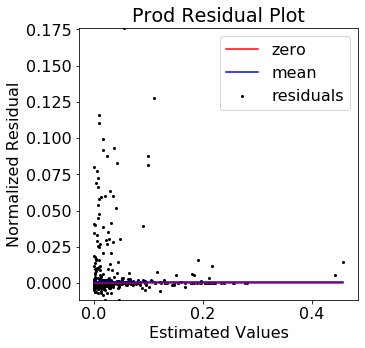

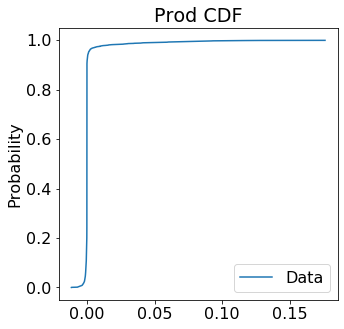

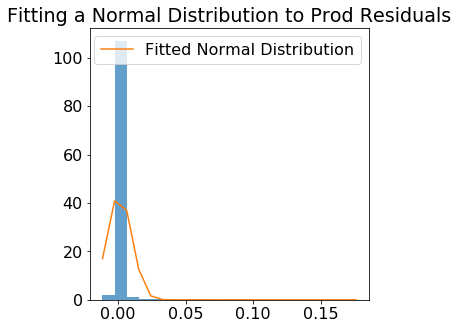

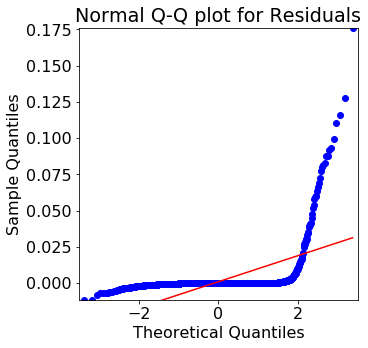

In [507]:
varname = 'Prod'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitProd)
dat = ToDF(runval.Production_Data*1e-6)
mod = ToDF(runval.Production_Modeled)

allcrops = list(ToDF(runval.misfitProd).index.levels[2])
allcrops.remove('sugarcane')
allcrops

crs_dat = dat.loc(axis=0)[:, :, allcrops]
crs_mod = mod.loc(axis=0)[:, :, allcrops]
crs_res = res.loc(axis=0)[:, :, allcrops]

resid_mean, resid_stdev, norm_residual, data, fits= residual_checks(varname, crs_res,crs_dat,crs_mod, savepath)

norm = ToDF(runval.Production_norm2).loc(axis=0)['wheat']['Production_norm2']  # normalization value
W =1 # runval['W_Prod'].data          # weight

print('norm=%.3f'%norm)
#print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> Sugarcane Prod Resid </font>

Residual Stats
sugarcane
mean=0.632
stdv=2.346

Normality Test from scipy.stats
Statistics=313.880, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.100
weight=1.000

T Test from scipy.stats
t_stat=3.752
p-value=2.317e-04
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

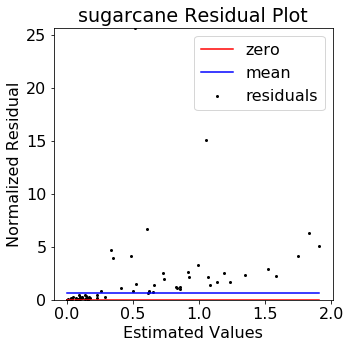

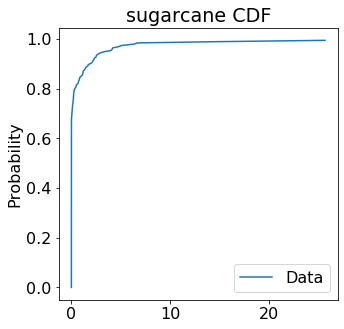

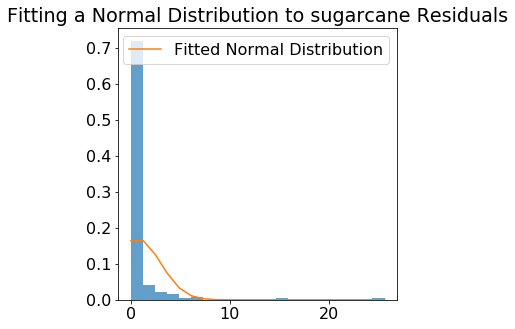

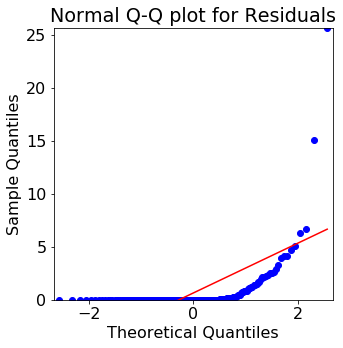

In [508]:
varname = 'sugarcane'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitProd)
dat = ToDF(runval.Production_Data*1e-6)
mod = ToDF(runval.Production_Modeled)

norm = ToDF(runval.Production_norm2).loc(axis=0)['sugarcane']['Production_norm2']

sgc_dat = dat.loc(axis=0)[:, :, 'sugarcane']
sgc_mod = mod.loc(axis=0)[:, :, 'sugarcane']
sgc_res = res.loc(axis=0)[:, :, 'sugarcane']

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, sgc_res,sgc_dat,sgc_mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'>Prod Bar Graph </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


<Figure size 1080x360 with 0 Axes>

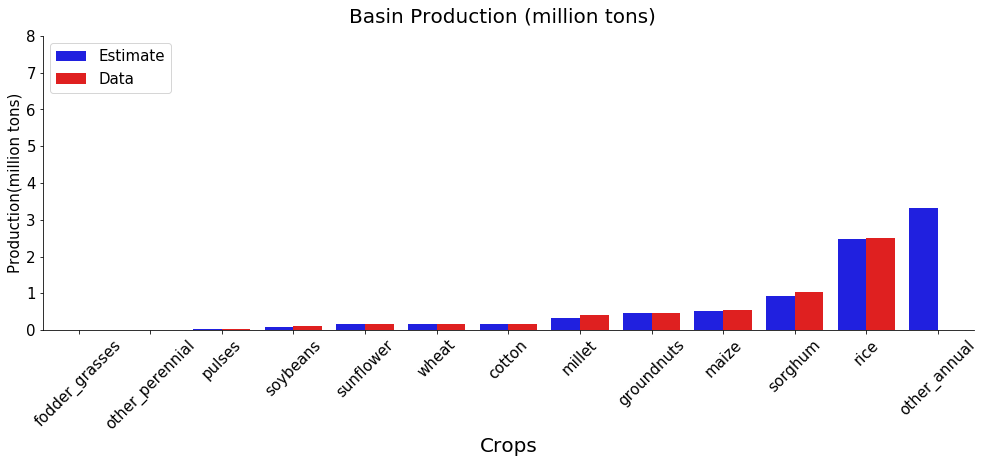

<Figure size 144x360 with 0 Axes>

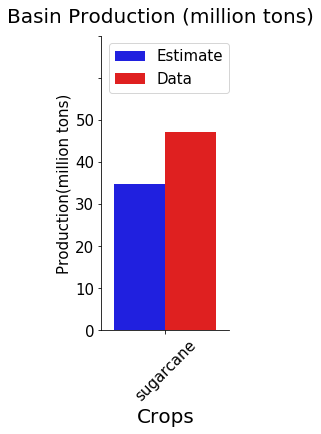

In [509]:
X  = plotProductionBar(path,file,runval, savepath)

SugarcaneX_ToPlot= X[X['crop']=='sugarcane']

plt.figure(figsize=(2, 5))
    
#axes_1 = plt.subplot(111)

import seaborn as sns
clrs = ['blue','red'] #['grey' if (x < max(values)) else 'red' for x in values ]


f = sns.catplot(data=SugarcaneX_ToPlot, x='crop', y='Production (million tons)',
                   hue='Label',  kind='bar', palette =clrs, #ax=axes_1,
                   height=10, aspect=1, legend=False, legend_out=True)

f.fig.set_size_inches(2,5)
f.fig.suptitle('Basin Production (million tons)', fontsize=20)
f.fig.subplots_adjust(top=.9) #leave space

f.set_xlabels('Crops', fontsize= 20)
f.set_xticklabels(rotation=45, fontsize=15)

f.set_ylabels('Production(million tons)', fontsize= 15)
f.set_yticklabels(fontsize=15, rotation=0)
f.set_titles(size=20)

plt.legend(loc='upper left', fontsize=15)

plt.ylim([0,70])

plt.show()

## <font color='red'>SubProd Graph </font>

### <font color='green'> SubProd Resid </font>

Residual Stats
Subprod
mean=-0.003
stdv=0.050

Normality Test from scipy.stats
Statistics=20452.842, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.882
weight=0.500

T Test from scipy.stats
t_stat=-5.020
p-value=5.273e-07
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

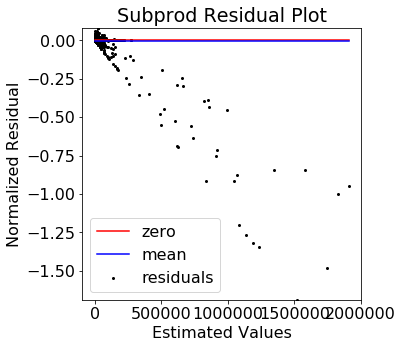

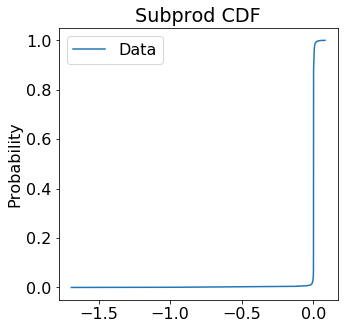

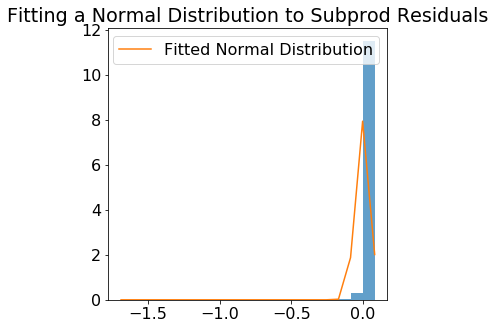

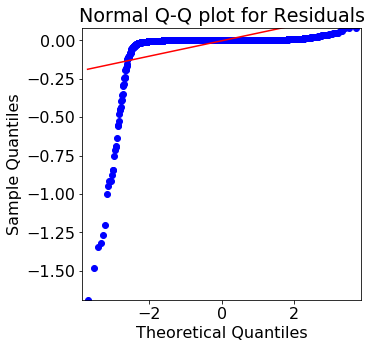

In [510]:
varname = 'Subprod'

res = ToDF(runval.misfitSubProd)
dat = ToDF(runval.SubcropProductionPrior*1e-6)
mod = ToDF(runval.SubcropProduction)

norm = runval['SubProd_norm2'].mean().data*1  # normalization value
W = runval['W_SubProd'].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> SubProd Graph </font>

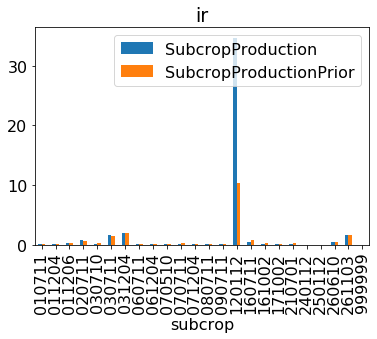

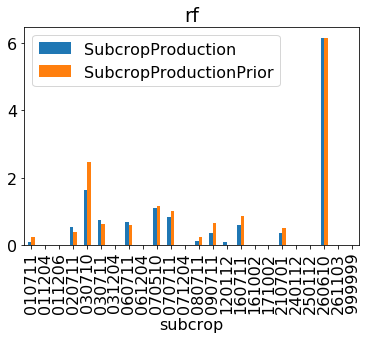

In [511]:
res = ToDF(runval.misfitSubProd)
dat = ToDF(runval.SubcropProductionPrior*1e-6)
mod = ToDF(runval.SubcropProduction*1e-6)

df1 = mod.groupby(['clut','subcrop']).sum()
df2 = dat.groupby(['clut','subcrop']).sum()
df3 = df1.join(df2)
df4 = df3.reset_index()

ir = (df4[df4['clut']=='ir']).set_index('subcrop').drop('clut', axis=1)
ir.plot(kind='bar', title='ir')

rf = (df4[df4['clut']=='rf']).set_index('subcrop').drop('clut', axis=1)
rf.plot(kind='bar', title='rf')

## <font color='red'> Basin Runoff </font>

### <font color='green'> Runoff (R2) Resid </font>

Residual Stats
R2
mean=0.978
stdv=0.893

Normality Test from scipy.stats
Statistics=3.422, p=0.181
Sample looks Gaussian (p>0.05)


/Users/Anjuli/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


norm=0.431
weight=1.000

T Test from scipy.stats
t_stat=3.635
p-value=3.924e-03
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

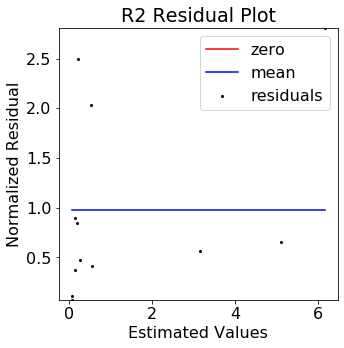

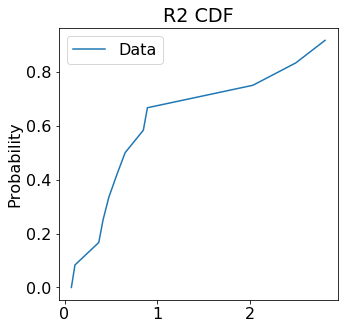

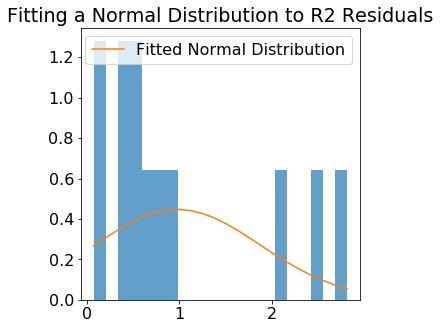

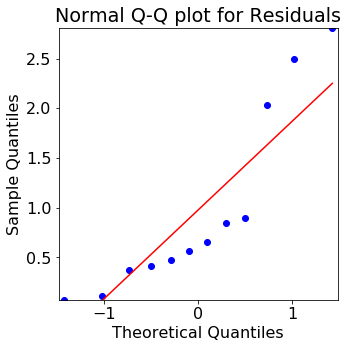

In [512]:
varname = 'R2'

res = ToDF(runval.misfitR)
dat = ToDF(runval.R_Data)
mod = ToDF(runval.R_Modeled)

res = res.loc(axis=0)['06','14',:]
dat = dat.loc(axis=0)['06','14',:]
mod = dat.loc(axis=0)['06','14',:]

norm = ToDF(runval.R_norm2).loc(axis=0)['06','14']['R_norm2']   # normalization value
W = 1; #runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> Runoff Timeseries </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


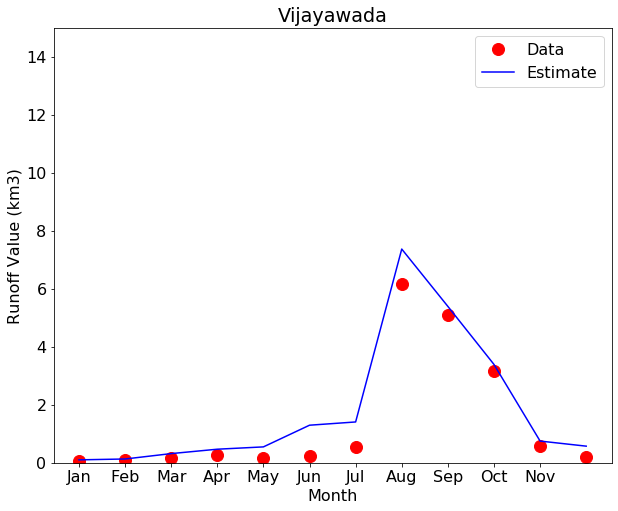

Pearsons correlation: 0.987
Spearman correlation: 0.930
DataSum: 16.698
ModSum: 21.757
0.3029861360697931


In [513]:
df = plotrunoff(runval, runval, savepath)


from scipy.stats import pearsonr, spearmanr

corr_p = pearsonr(df['R_Data'], df['R_Modeled'])
corr_s = spearmanr(df['R_Data'], df['R_Modeled'])

print('Pearsons correlation: %.3f' % corr_p[0])
print('Spearman correlation: %.3f' % corr_s[0])
print('DataSum: %.3f'% df['R_Data'].sum())
print('ModSum: %.3f' % df['R_Modeled'].sum())
print((df['R_Modeled'].sum() - df['R_Data'].sum())/df['R_Data'].sum())

## <font color='red'> GW Head </font>

### <font color='green'> Head Resid </font>

Residual Stats
H
mean=0.001
stdv=0.052

Normality Test from scipy.stats
Statistics=2649.294, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.060
weight=1.000

T Test from scipy.stats
t_stat=0.591
p-value=5.548e-01
(p>0.05) Accept null hypothesis that the mean is equal to 0from normal distrn


True

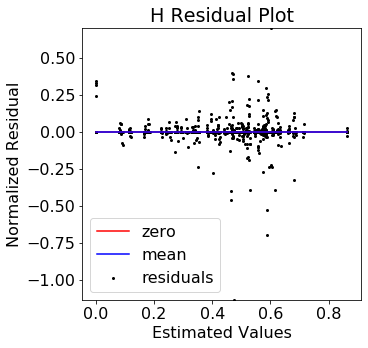

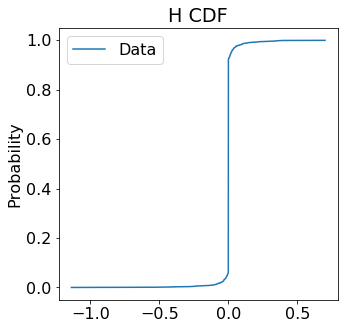

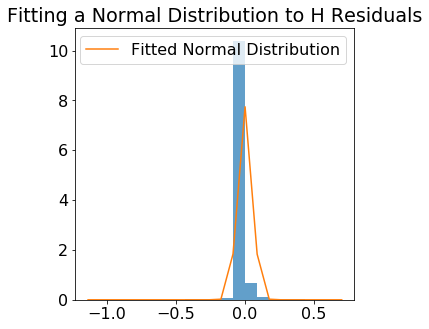

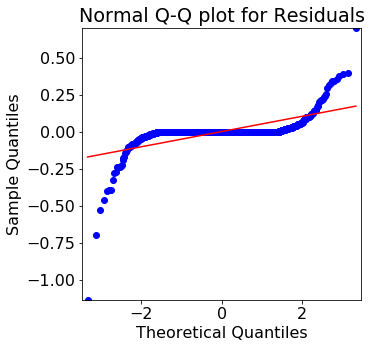

In [514]:
## Data
varname = 'H'
mTokm=1e-3


# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitH)
dat = ToDF(runval.Head_Data*mTokm)
mod = ToDF(runval.H)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> Head Scatter Fit </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


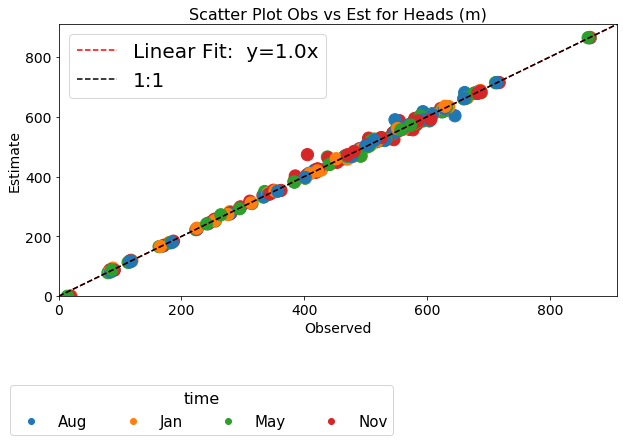

In [515]:
stats = plotGWHeadScatter(runval,[], savepath)

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


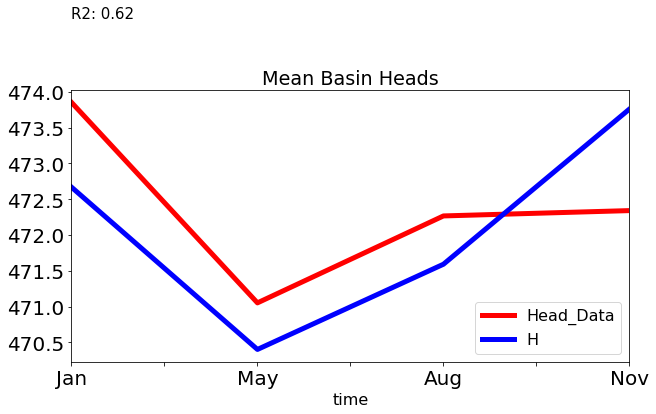

In [516]:
df = plotMeanBasinHeadTS(runval,[], savepath)

## <font color='red'> GW Depletion </font>

### <font color='green'> GW Depletion Resid </font>

Residual Stats
GWD
mean=0.152
stdv=0.318

Normality Test from scipy.stats
Statistics=45.437, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.202
weight=1.000

T Test from scipy.stats
t_stat=4.422
p-value=2.846e-05
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

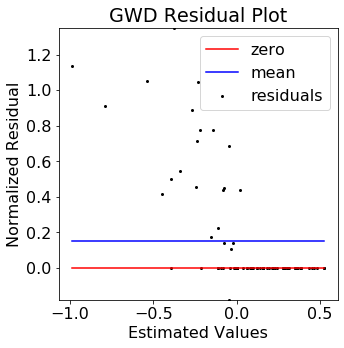

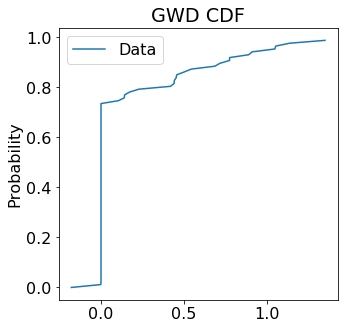

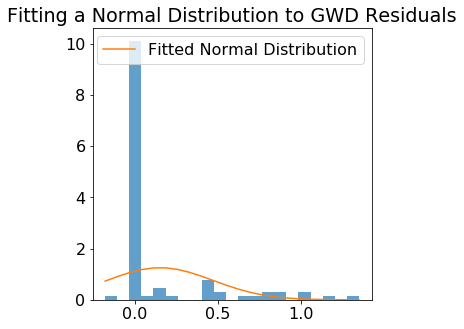

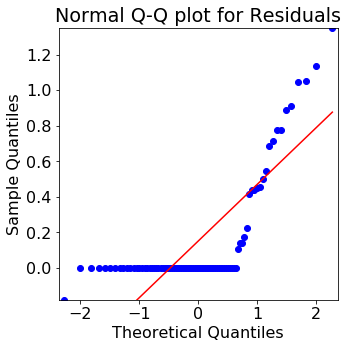

In [517]:
## Data
varname = 'GWD'
mTokm=1e-3


# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitGW)
dat = ToDF(runval.gwd)
mod = ToDF(runval.GWD_Modeled)
#pd.DataFrame((runval.SSy.data*runval.A.data*runval.m2Tokm2.data)*((runval.Hfinal.data)-runval.H[:,:,0].data)).unstack()

norm = runval['gwd_norm2'].data   # normalization value
W = runval['W_GWD'].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits= residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> GW Depletion Scatter Fit </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


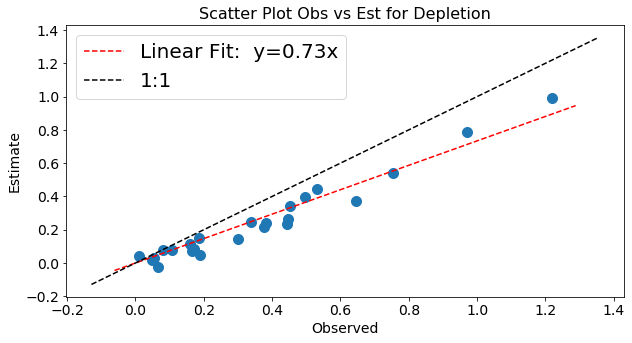

In [518]:
df = plotGWDepletionScatter(runval, [], savepath)

## <font color='red'> ET, Soil Moisture, Recharge </font>

### <font color='green'> ET (MODIS) Resid </font>

Residual Stats
ET
mean=0.001
stdv=0.198

Normality Test from scipy.stats
Statistics=538.606, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.210
weight=1.000

T Test from scipy.stats
t_stat=0.346
p-value=7.293e-01
(p>0.05) Accept null hypothesis that the mean is equal to 0from normal distrn


True

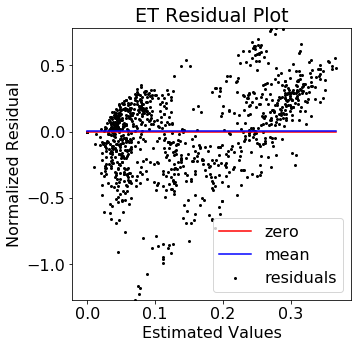

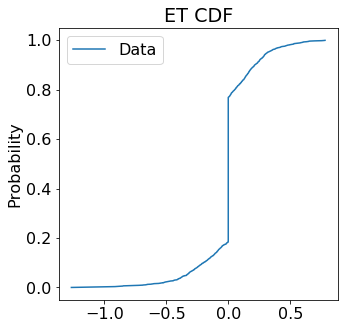

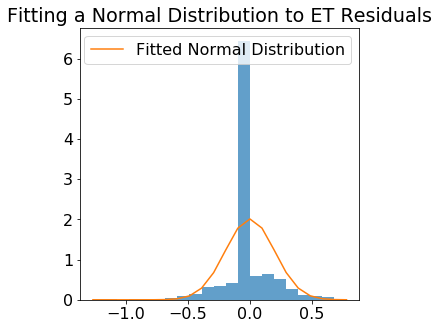

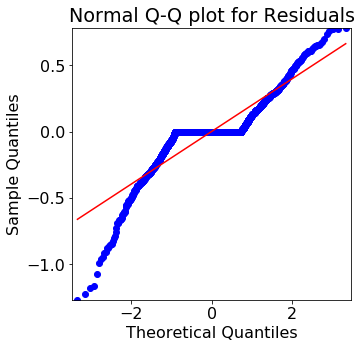

In [519]:
## Data
varname = 'ET'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitET)
dat = ToDF(runval.ET_Data)
mod = ToDF(runval.ET_Modeled)

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight



print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> ET2 (ROM) Resid </font>

Residual Stats
ET2
mean=0.105
stdv=0.218

Normality Test from scipy.stats
Statistics=1421.043, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.230
weight=1.000

T Test from scipy.stats
t_stat=23.190
p-value=2.931e-107
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

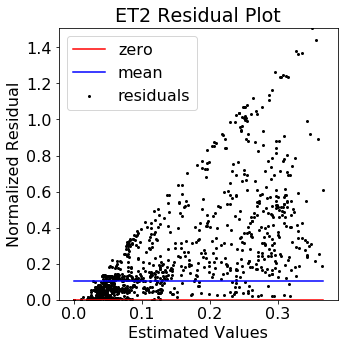

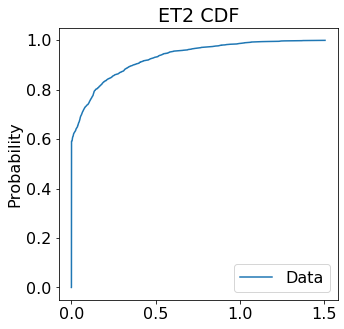

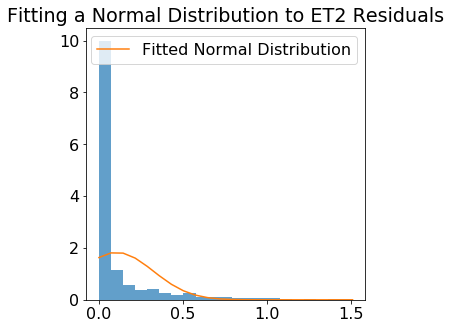

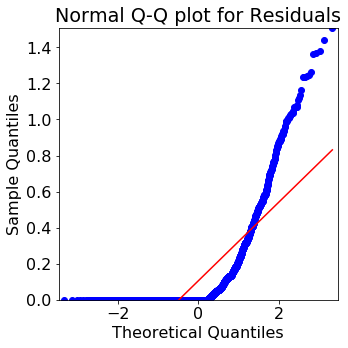

In [520]:
varname = 'ET2' #ROM

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitET2)
dat = ToDF(runval.ET_ROM_pixel)
mod = ToDF(runval.ET_Modeled)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> SM Resid </font>

Residual Stats
dS
mean=0.014
stdv=0.106

Normality Test from scipy.stats
Statistics=851.518, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.124
weight=1.000

T Test from scipy.stats
t_stat=6.270
p-value=4.297e-10
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

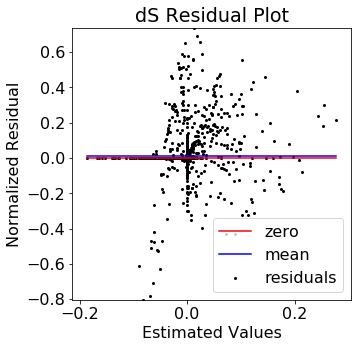

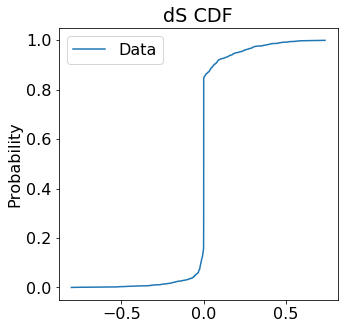

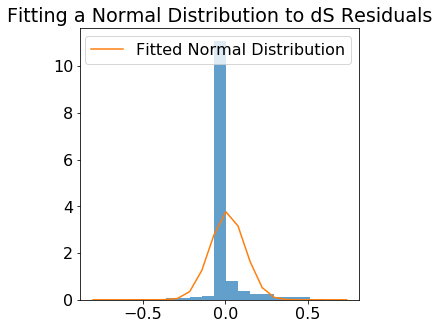

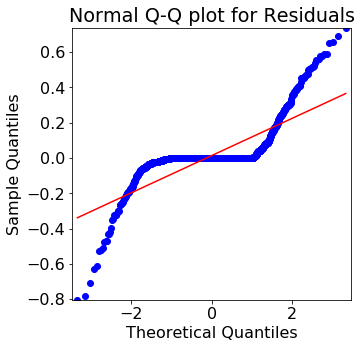

In [521]:
## Data
varname = 'dS'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitdS)
dat = ToDF(runval.dS_ROM_pixel)
mod = ToDF(runval.dS_Modeled)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits= residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> Recharge Resid </font>

Residual Stats
W
mean=0.000
stdv=0.106

Normality Test from scipy.stats
Statistics=570.982, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.107
weight=1.000

T Test from scipy.stats
t_stat=0.005
p-value=9.958e-01
(p>0.05) Accept null hypothesis that the mean is equal to 0from normal distrn


True

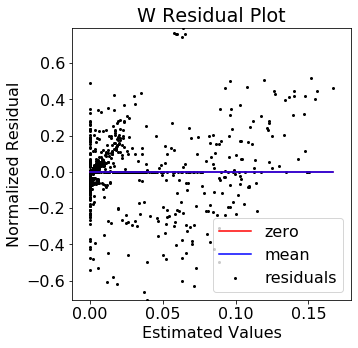

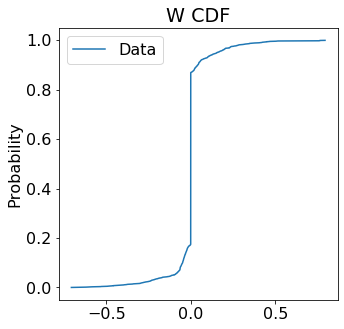

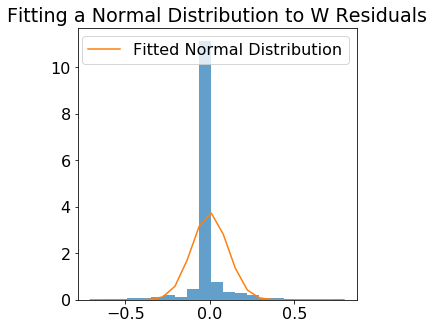

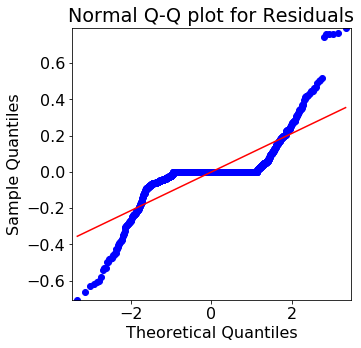

In [522]:
varname = 'W'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitW)
dat = ToDF(runval.W_ROM_pixel)
mod = ToDF(runval.W_Modeled)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='blue'> ET, SM, W Timeseries </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


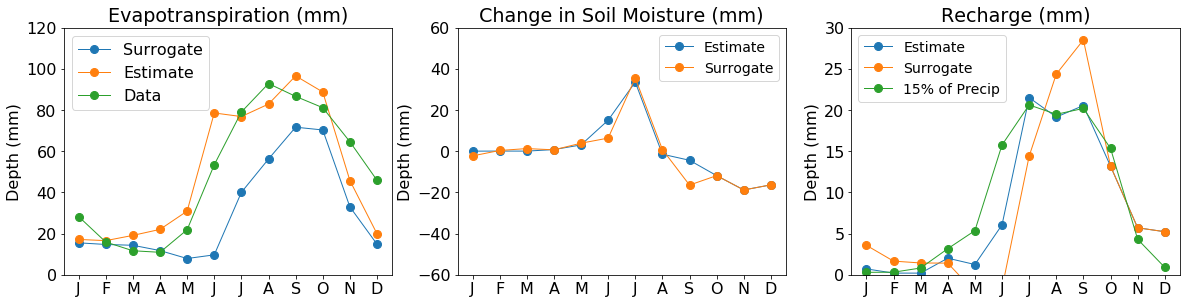

In [523]:
ROM(runval, savepath)

## ETf and R gauges

### <font color='green'> ETf Resid </font>

Residual Stats
ETf
mean=0.001
stdv=0.135

Normality Test from scipy.stats
Statistics=286871.229, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.090
weight=1.000

T Test from scipy.stats
t_stat=3.497
p-value=4.705e-04
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

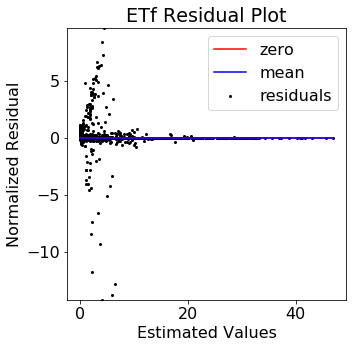

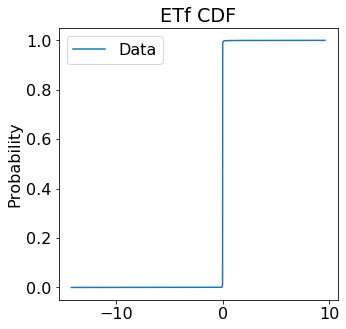

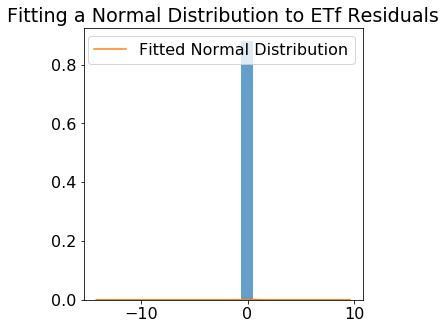

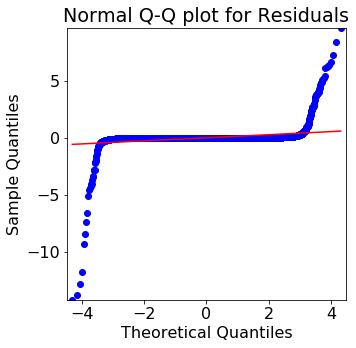

In [524]:
## Data
varname = 'ETf'

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitETf)
dat = ToDF(runval.ETf)
mod = ToDF(runval.ETf_ROM)

norm = runval[varname+'_norm2'].data   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

do_two_sided_t_test(norm_residual)

### <font color='green'> R Gauges Resid </font>

Residual Stats
R
mean=-0.023
stdv=0.314

Normality Test from scipy.stats
Statistics=2981.440, p=0.000
Sample does not look Gaussian (p<0.05)
norm=0.550
weight=1.000

T Test from scipy.stats
t_stat=-3.005
p-value=2.692e-03
(p<0.05) Reject the null hypothesis that the means is equal to 0from normal distrn


False

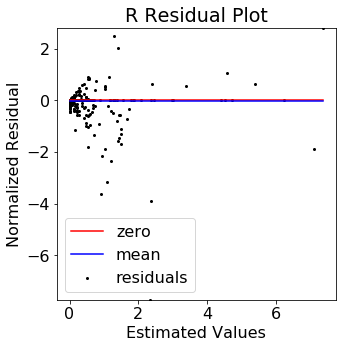

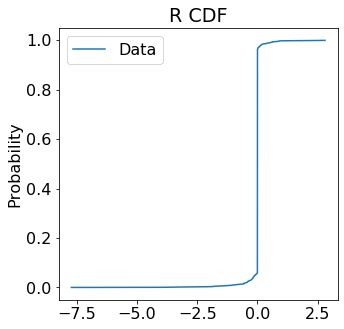

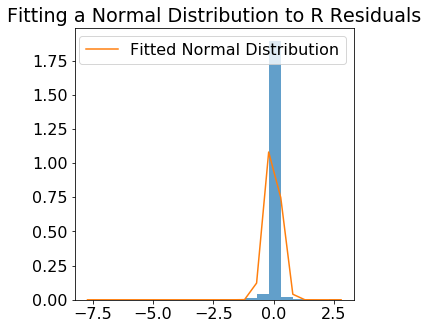

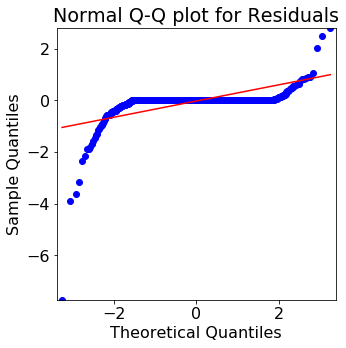

In [525]:
## Data
varname = 'R'
mTokm=1e-3

# Store in DataFrames with Locations and Time index
res = ToDF(runval.misfitR)
dat = ToDF(runval.R_Data)
mod = ToDF(runval.R_Modeled)

norm = ToDF(runval.R_norm2).reset_index().drop(14).mean()['R_norm2']   # normalization value
W = runval['W_'+varname].data          # weight

resid_mean, resid_stdev, norm_residual, data, fits = residual_checks(varname, res,dat,mod, savepath)

print('norm=%.3f'%norm)
print('weight=%.3f'%W)

write_to_excel(varname, row_num)

# NOTE -- this plot includes the downstream gauge also

do_two_sided_t_test(norm_residual)

### <font color='blue'> R Gauges </font>

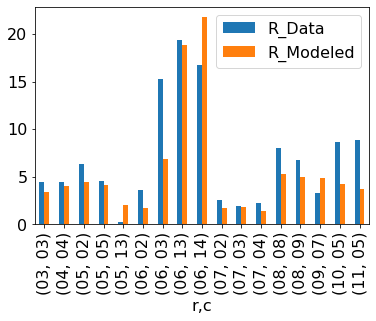

In [526]:
res = ToDF(runval.misfitR)
dat = ToDF(runval.R_Data)
mod = ToDF(runval.R_Modeled)

#Discharge Guages
df1 = dat.groupby(['r','c']).sum()
df2 = mod.groupby(['r','c']).sum()
df3 = df1.join(df2)
df3.plot(kind='bar')

# Additional Checks

## <font color='black'> ET and Crop Area </font>

/Users/Anjuli/anaconda3/lib/python3.7/site-packages/gdx/__init__.py:136: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  super(File, self).set_coords(name, inplace=True)


saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


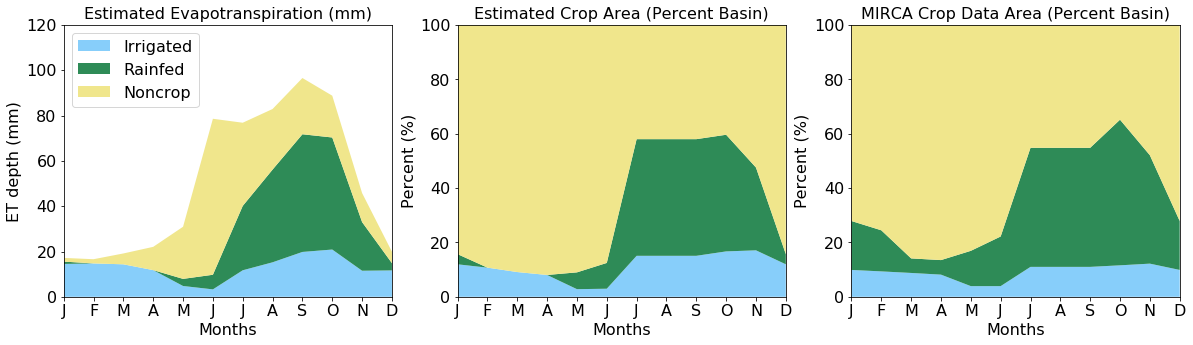

In [527]:
input_data = gdx.File(path+"/"+'inputs.gdx')

ira_data= monthsort(ToDF(input_data.CA_Data[:,:,:,0,:]).groupby(level=['time']).sum(),0) #thousand m2
rfa_data= monthsort(ToDF(input_data.CA_Data[:,:,:,1,:]).groupby(level=['time']).sum(),0)
ira_data.columns=['ira']
rfa_data.columns=['rfa']
CA_dat = ira_data.join(rfa_data) # km2

croplandET(runval, CA_dat, savepath)

## <font color='black'> ET by Crop </font>

saved in /Users/Anjuli/Desktop/__FINAL_DAS/deleteme


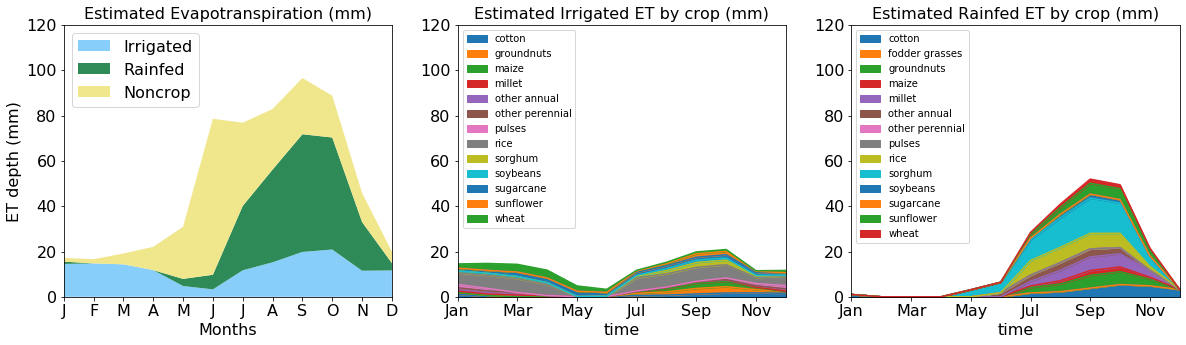

In [528]:
ETbyCrop(runval,CA_dat, savepath)

## <font color='black'> Yield </font>

saved in Image_Outputs/Yield/


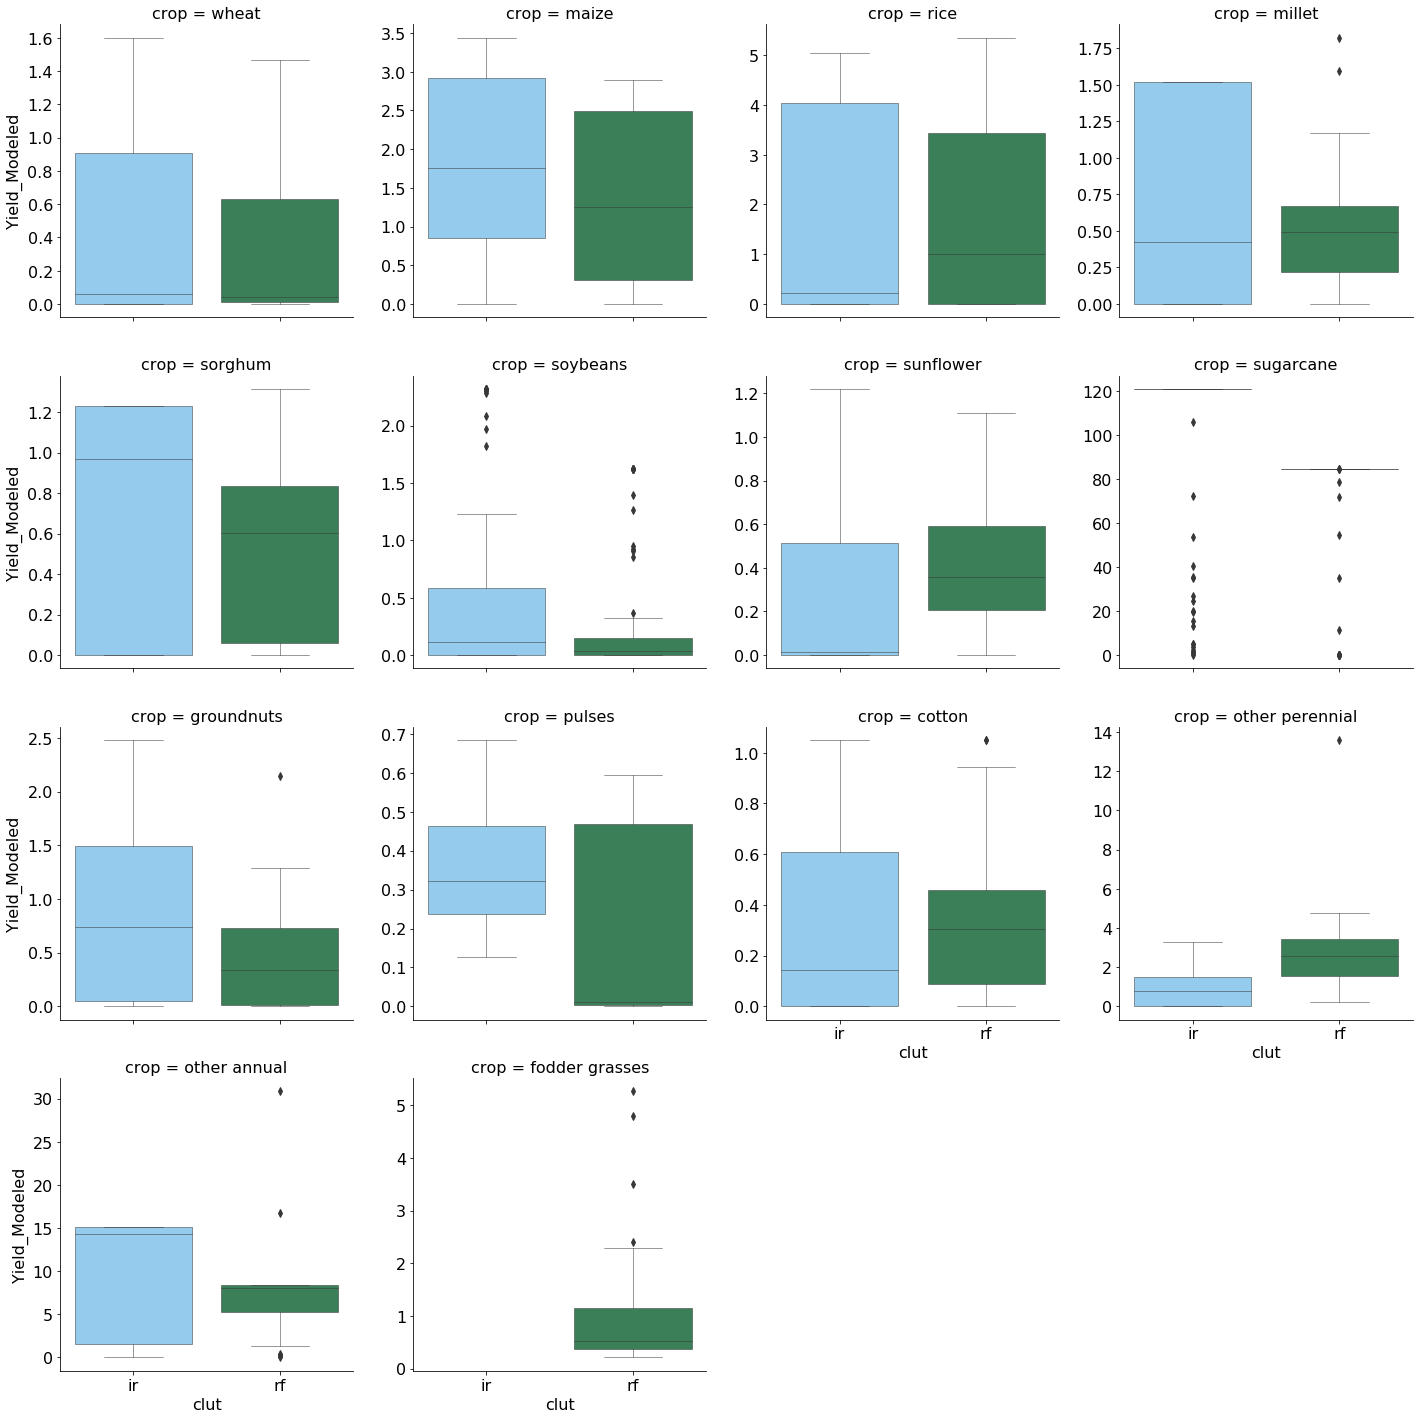

In [529]:
savepath = 'Image_Outputs/Yield/'

YM = ToDF(runval.Yield_Modeled) #tons per 
YM.reset_index(inplace=True)

YM['crop']=YM['subcrop'].map(lambda x: str(x)[:-4])
YM['crop'].replace(MIRCA2000_cropclassesStr2, inplace=True)

import seaborn as sns
#f.fig.set_size_inches(8, 4)
f= sns.catplot(x="clut", y="Yield_Modeled", col='crop', col_wrap=4,
                  data=YM, legend=True, palette=sns.color_palette(['lightskyblue','seagreen']),
                  linewidth=0.5, kind='box', sharey=False)




plt.savefig(savepath+'yield_distribution_box.png', format='png', dpi=1200)
print('saved in '+savepath)   

plt.show()

## <font color='black'>Water Balance </font>

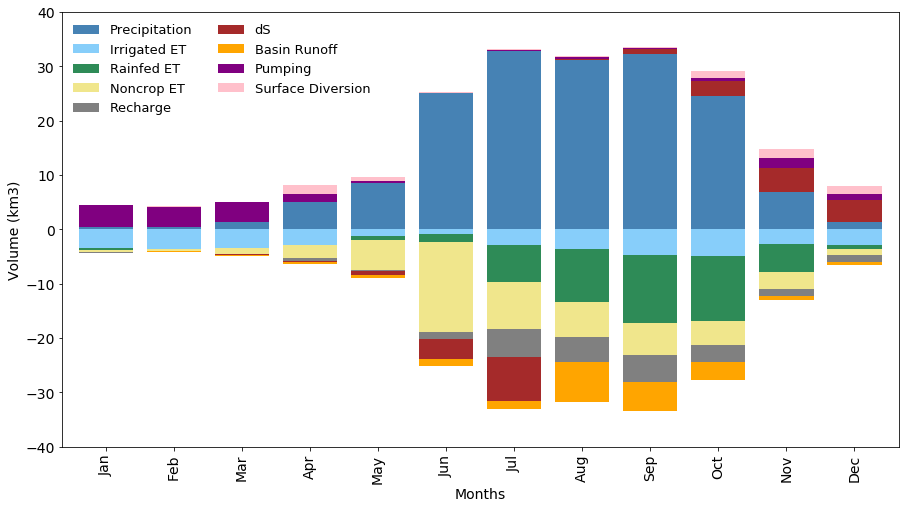

In [530]:
df = plotWaterBalance(runval)